In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk         ## for text
import re           ## regular expression
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer  ## it converts the word into its base form

In [25]:
## Dataset

df = pd.read_csv('tennis.csv')
df.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [26]:
df['article_text'][0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same 

In [27]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

sentences = sentences[0]

In [28]:
sentences

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at all.

In [29]:
w_d = {}

clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", "  ")
clean_sentences = [s.lower() for s in clean_sentences]
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

C:\Users\Ahmed Ali\AppData\Local\Temp\ipykernel_13656\4144057432.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", "  ")


In [31]:
sentence_vectors = []

for s in clean_sentences:
    if s:
        words = s.split()
        word_vectors = [w_d.get(word, np.zeros(100)) for word in words]
        sentence_vector = np.mean(word_vectors, axis=0)
    else:
        sentence_vector = np.zeros(100)
    sentence_vectors.append(sentence_vector)

In [32]:
sim_mat = np.zeros([len(sentences), len(sentences)])
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

Graph with 17 nodes and 0 edges


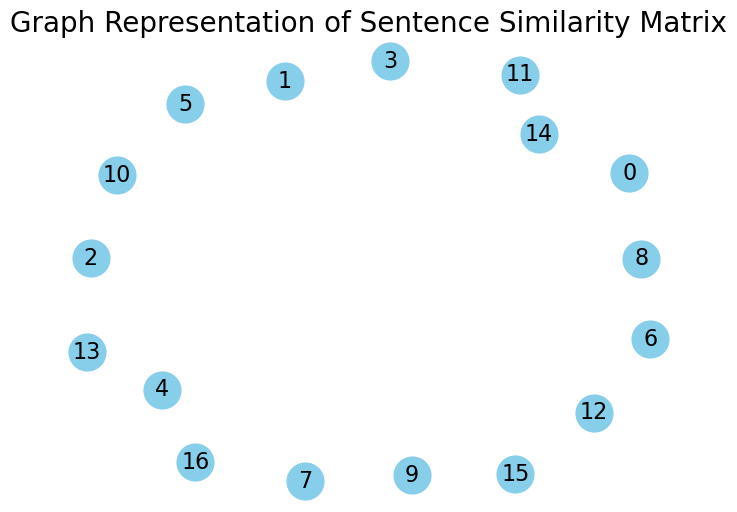

In [39]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
print(nx_graph)



fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)  # Spring layout for better visualization
nx.draw(nx_graph, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=16, font_color='black')
ax.set_title("Graph Representation of Sentence Similarity Matrix",fontsize=20)
plt.show()

scores = nx.pagerank(nx_graph)


In [40]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
for i in range(5):
    print("ARTICLE:")
    print(df['article_text'][i])
    print('\n')
    print("SUMMARY:")
    print(ranked_sentences[i][1])
    print('\n')

ARTICLE:
Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in t